In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
proj_path = '/data100t1/home/wanying/CCHC/proteomics/20241014_data_cleaning/output'
id_mapping_fn = f'{proj_path}/olink_uniprot_assay_id_mapping.csv'
df_id_mapping= pd.read_csv(id_mapping_fn)
display(df_id_mapping.head(2))

protein_fn = f'{proj_path}/20240919_CCHC_proteomics.batch2.OlinkID.NPX.csv'
df_protein = pd.read_csv(protein_fn)
display(df_protein.head(2))

pheno_fn = '/data100t1/share/CCHC/phenotypes/0724/cchc_phenotypes_0724.txt'
cols = ['RRID', 'LABID', 'AGE_AT_VISIT', 'GENDER']
df_pheno = pd.read_csv(pheno_fn, sep='|', dtype=str)[cols]
for col in ['AGE_AT_VISIT', 'GENDER']:
    df_pheno[col] = pd.to_numeric(df_pheno[col], errors='coerce')
display(df_pheno.head(2))

# Merge phenotype with df_protein
df_protein_merge = df_pheno.merge(df_protein, on='LABID')
display(df_protein_merge.head(2))

,OlinkID,UniProt,Assay
0,OID45511,EXT1,Extension control 1
1,OID45519,INC1,Incubation control 1


,LABID,OID45511,OID45519,OID45503,OID40001,OID40002,OID40003,OID40004,OID40005,OID40006,...,OID45493,OID45494,OID45495,OID45496,OID45497,OID45498,OID45499,OID45500,OID45501,OID45502
0,10Y0001,0.0,0.098128,0.009231,1.719527,1.415027,-0.662254,1.242358,-0.145884,-4.228008,...,-0.187204,-0.333129,-0.048588,0.351591,0.072964,0.038539,0.112379,-0.363623,-0.330237,-0.060775
1,10Y0005,0.0,0.084841,0.118812,1.020391,1.059447,-0.461474,-0.099768,-0.672721,2.240973,...,0.214983,0.129681,0.060721,0.019057,0.313470,0.118445,0.091292,0.262861,-0.013622,-0.174585


,RRID,LABID,AGE_AT_VISIT,GENDER
0,BD0001,BD4001,40.0,2.0
1,BD0001,5Y0002,30.4,2.0


,RRID,LABID,AGE_AT_VISIT,GENDER,OID45511,OID45519,OID45503,OID40001,OID40002,OID40003,...,OID45493,OID45494,OID45495,OID45496,OID45497,OID45498,OID45499,OID45500,OID45501,OID45502
0,BD0005,15Y0055,51.1,1.0,0.0,0.078425,0.058952,1.095446,0.196774,4.525359,...,0.002698,0.082991,0.430357,0.036555,0.015324,0.228875,0.512836,0.211335,0.814661,-0.522716
1,BD0009,15Y0224,61.2,1.0,0.0,-0.047388,0.016086,3.353032,1.195139,6.889091,...,-0.197254,-0.164190,-0.001129,-0.054188,0.064943,0.147697,0.199649,0.220925,0.343605,0.068846


In [3]:
df_id_mapping[(df_id_mapping['Assay']=='EDDM3B') | (df_id_mapping['Assay']=='PZP')]

,OlinkID,UniProt,Assay
3610,OID43651,P56851,EDDM3B
5427,OID45485,P20742,PZP


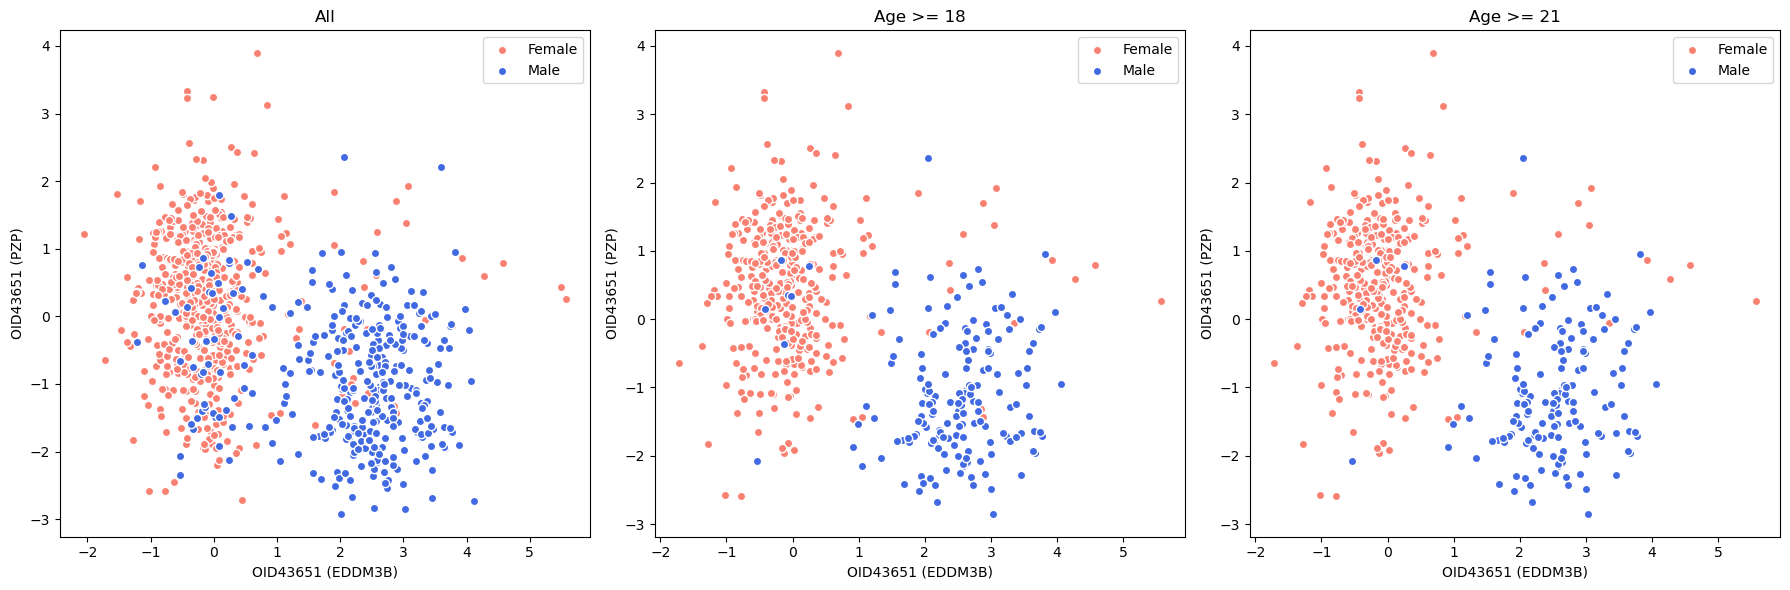

In [24]:
fig, ax = plt.subplots(figsize=(18,6), ncols=3)
mask_male = df_protein_merge['GENDER']==1
mask_female = df_protein_merge['GENDER']==2


ax[0].scatter(df_protein_merge[mask_female]['OID43651'],
           df_protein_merge[mask_female]['OID45485'],
           color='salmon',
           edgecolor='w', label='Female')

ax[0].scatter(df_protein_merge[mask_male]['OID43651'],
           df_protein_merge[mask_male]['OID45485'],
           color='royalblue',
           edgecolor='w', label='Male')
ax[0].legend()
ax[0].set_xlabel('OID43651 (EDDM3B)')
ax[0].set_ylabel('OID43651 (PZP)')
ax[0].set_title('All')


age_threshold = 18
mask_age = df_protein_merge['AGE_AT_VISIT']>=age_threshold 
ax[1].scatter(df_protein_merge[mask_female&mask_age]['OID43651'],
           df_protein_merge[mask_female&mask_age]['OID45485'],
           color='salmon',
           edgecolor='w', label='Female')

ax[1].scatter(df_protein_merge[mask_male&mask_age]['OID43651'],
           df_protein_merge[mask_male&mask_age]['OID45485'],
           color='royalblue',
           edgecolor='w', label='Male')
ax[1].legend()

ax[1].set_xlabel('OID43651 (EDDM3B)')
ax[1].set_ylabel('OID43651 (PZP)')
ax[1].set_title(f'Age >= {age_threshold}')

age_threshold = 21
mask_age = df_protein_merge['AGE_AT_VISIT']>=age_threshold 
ax[2].scatter(df_protein_merge[mask_female&mask_age]['OID43651'],
           df_protein_merge[mask_female&mask_age]['OID45485'],
           color='salmon',
           edgecolor='w', label='Female')

ax[2].scatter(df_protein_merge[mask_male&mask_age]['OID43651'],
           df_protein_merge[mask_male&mask_age]['OID45485'],
           color='royalblue',
           edgecolor='w', label='Male')
ax[2].legend()

ax[2].set_xlabel('OID43651 (EDDM3B)')
ax[2].set_ylabel('OID43651 (PZP)')
ax[2].set_title(f'Age >= {age_threshold}')
fig.tight_layout()
# df_protein_merge

In [29]:
df_protein_merge.iloc[:, 4:].isna().sum().sum()

0

In [30]:
fn = '/data100t1/share/CCHC/CCHC_proteomics_batch2/McCormick_Below_North_Shah_Freedman_NPX_2024-09-19.parquet'
df_data = pd.read_parquet(fn)
output_fn = 'McCormick_Below_North_Shah_Freedman_NPX_2024-09-19.csv'
# df.to_csv(output_fn, index=False)
df_data.head()

,SampleID,SampleType,WellID,PlateID,DataAnalysisRefID,OlinkID,UniProt,Assay,AssayType,Panel,Block,Count,ExtNPX,NPX,Normalization,PCNormalizedNPX,AssayQC,SampleQC,ExploreVersion
0,10Y0033,SAMPLE,A1,Piper_Joe_Rack_1_(15)_for_NPX,D10001,OID45511,EXT1,Extension control 1,ext_ctrl,Explore_HT,1,4504,0.0,0.0,Intensity,0.0,NA,PASS,6.7.2
1,5Y0629,SAMPLE,A2,Piper_Joe_Rack_1_(15)_for_NPX,D10001,OID45511,EXT1,Extension control 1,ext_ctrl,Explore_HT,1,6442,0.0,0.0,Intensity,0.0,NA,PASS,6.7.2
2,BA0150,SAMPLE,A3,Piper_Joe_Rack_1_(15)_for_NPX,D10001,OID45511,EXT1,Extension control 1,ext_ctrl,Explore_HT,1,5501,0.0,0.0,Intensity,0.0,NA,PASS,6.7.2
3,5Y0396,SAMPLE,A4,Piper_Joe_Rack_1_(15)_for_NPX,D10001,OID45511,EXT1,Extension control 1,ext_ctrl,Explore_HT,1,6570,0.0,0.0,Intensity,0.0,NA,PASS,6.7.2
4,BA0566,SAMPLE,A5,Piper_Joe_Rack_1_(15)_for_NPX,D10001,OID45511,EXT1,Extension control 1,ext_ctrl,Explore_HT,1,13095,0.0,0.0,Intensity,0.0,NA,PASS,6.7.2


In [31]:
df_data.columns

Index(['SampleID', 'SampleType', 'WellID', 'PlateID', 'DataAnalysisRefID',
       'OlinkID', 'UniProt', 'Assay', 'AssayType', 'Panel', 'Block', 'Count',
       'ExtNPX', 'NPX', 'Normalization', 'PCNormalizedNPX', 'AssayQC',
       'SampleQC', 'ExploreVersion'],
      dtype='object')

In [35]:
df_data['SampleQC'].value_counts()

SampleQC
PASS    7314938
FAIL       1661
WARN        137
Name: count, dtype: int64

In [36]:
df_data['AssayQC'].value_counts()

AssayQC
PASS    7281600
NA        32256
WARN       2880
Name: count, dtype: int64

In [37]:
df_data['AssayType'].unique()

array(['ext_ctrl', 'inc_ctrl', 'amp_ctrl', 'assay'], dtype=object)

In [38]:
mask = df_data['AssayType'] == 'assay'
df_data[mask]['AssayQC'].value_counts()

AssayQC
PASS    7281600
WARN       2880
Name: count, dtype: int64

In [39]:
df_data[mask]['SampleQC'].value_counts()

SampleQC
PASS    7282694
FAIL       1652
WARN        134
Name: count, dtype: int64

In [46]:
print(df_data[df_data['AssayQC']=='WARN']['SampleID'].unique())

['10Y0033' '5Y0629' 'BA0150' ... 'BL0286' 'BL0299' 'BL0158']


In [47]:
print(df_data[df_data['SampleQC']!='FAIL']['SampleID'].unique())
print(len(df_data[df_data['SampleQC']!='FAIL']['SampleID'].unique()))
# print(df_data[df_data['AssayQC']=='NA']['SampleID'].unique())
# len(df_data[df_data['AssayQC']=='NA']['SampleID'].unique())

['10Y0033' '5Y0629' 'BA0150' ... 'BL0286' 'BL0299' 'BL0158']
1214


In [48]:
df_data[df_data['SampleQC']=='FAIL']

,SampleID,SampleType,WellID,PlateID,DataAnalysisRefID,OlinkID,UniProt,Assay,AssayType,Panel,Block,Count,ExtNPX,NPX,Normalization,PCNormalizedNPX,AssayQC,SampleQC,ExploreVersion
3729983,SC1,SAMPLE_CONTROL,H12,Piper_Joe_Rack_8_(22)_for_NPX,D20001,OID45512,EXT2,Extension control 2,ext_ctrl,Explore_HT,2,866,NaN,NaN,Intensity,NaN,NA,FAIL,6.7.2
3730079,SC1,SAMPLE_CONTROL,H12,Piper_Joe_Rack_8_(22)_for_NPX,D20001,OID45520,INC2,Incubation control 2,inc_ctrl,Explore_HT,2,658,NaN,NaN,Intensity,NaN,NA,FAIL,6.7.2
3730175,SC1,SAMPLE_CONTROL,H12,Piper_Joe_Rack_8_(22)_for_NPX,D20001,OID45504,AMP2,Amplification control 2,amp_ctrl,Explore_HT,2,1049,NaN,NaN,Intensity,NaN,NA,FAIL,6.7.2
3730271,SC1,SAMPLE_CONTROL,H12,Piper_Joe_Rack_8_(22)_for_NPX,D20001,OID40751,Q9NRG9,AAAS,assay,Explore_HT,2,3,NaN,NaN,Intensity,NaN,PASS,FAIL,6.7.2
3730367,SC1,SAMPLE_CONTROL,H12,Piper_Joe_Rack_8_(22)_for_NPX,D20001,OID40752,Q6PD74,AAGAB,assay,Explore_HT,2,5,NaN,NaN,Intensity,NaN,PASS,FAIL,6.7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6251051,NC1,NEGATIVE_CONTROL,A12,Piper_Joe_Rack_12_(26)_for_NPX,D60001,OID45293,P07911,UMOD,assay,Explore_HT,6,2198,NaN,NaN,Intensity,NaN,PASS,FAIL,6.7.2
6251147,NC1,NEGATIVE_CONTROL,A12,Piper_Joe_Rack_12_(26)_for_NPX,D60001,OID45294,Q9Y279,VSIG4,assay,Explore_HT,6,40,NaN,NaN,Intensity,NaN,PASS,FAIL,6.7.2
6251243,NC1,NEGATIVE_CONTROL,A12,Piper_Joe_Rack_12_(26)_for_NPX,D60001,OID45295,P04275,VWF,assay,Explore_HT,6,28,NaN,NaN,Intensity,NaN,PASS,FAIL,6.7.2
6251339,NC1,NEGATIVE_CONTROL,A12,Piper_Joe_Rack_12_(26)_for_NPX,D60001,OID45296,P23381,WARS1,assay,Explore_HT,6,499,NaN,NaN,Intensity,NaN,PASS,FAIL,6.7.2


In [52]:
tmp = df_data[df_data['AssayQC']=='NA']['NPX'].sort_values()
tmp[tmp.notna()]

2613318   -1.682419
2613376   -1.362093
2567169   -1.078438
2090765   -1.058787
1568070   -1.009014
             ...   
3129189    1.875679
2606529    2.289493
2606433    2.329721
1548010    2.473885
1548106    2.749572
Name: NPX, Length: 32247, dtype: float64

(array([2.0000e+00, 1.4000e+01, 2.2900e+02, 2.7278e+04, 4.6520e+03,
        5.0000e+01, 1.4000e+01, 3.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([-1.68241882, -1.23921971, -0.7960206 , -0.35282149,  0.09037762,
         0.53357673,  0.97677584,  1.41997495,  1.86317406,  2.30637317,
         2.74957228]),
 <BarContainer object of 10 artists>)

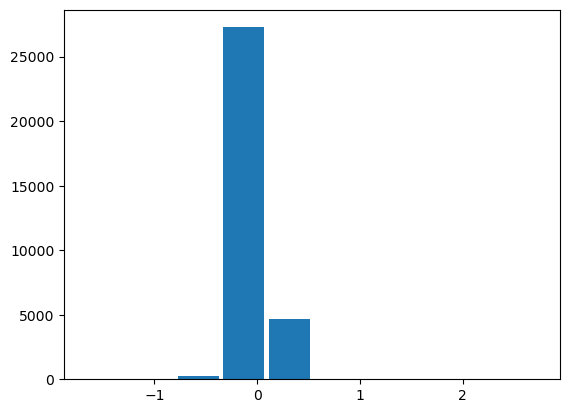

In [53]:
fig, ax = plt.subplots()
ax.hist(tmp[tmp.notna()], rwidth=0.9)